# **Práctica 4 - Algoritmos de Búsqueda Parte 1.**

#### **Dudas: Polinomio y Gráfica Espacial, Forma de la temporal, Ordenar Palabras**

## **Nodos y Algoritmos Ordenamiento**

In [79]:
import random
import matplotlib.pyplot as plt

class Node:
    def __init__(self, strName, intValue):
        self.name = strName
        self.value = intValue

    def __repr__(self):
        return f"{self.name} -> {self.value}"

def create_node_arr(size, type, low_limit, up_limit):
    arr = []
    i = 0
    while i < size:
        if type == 0:
            element = Node("Nodo " + str(i + 1), i + low_limit)
            arr.append(element)
        elif type == 1:
            element = Node("Nodo " + str(i + 1), up_limit - i)
            arr.append(element)
        elif type == 2:
            element = Node("Nodo " + str(i + 1), random.randint(low_limit, up_limit))
            arr.append(element)
        i += 1
    return arr

    def bubble_sort(arr):
        time = 0
        space = 0
        n = len(arr)
        i = 0
        space += 1
        while i < n:
            j = 0
            while j < n - i - 1:
                time += 1
                if arr[j].value > arr[j + 1].value:
                    temp = arr[j]
                    arr[j] = arr[j + 1]
                    arr[j + 1] = temp
                j += 1
            i += 1
        return time, space

def merge_sort(arr):
    n = len(arr)
    if n <= 1:
        return 0, 0
    
    current_space = n 
    time = 0

    mid = n // 2
    L = arr[:mid]
    R = arr[mid:]
    
    time_L, space_L = merge_sort(L)
    time_R, space_R = merge_sort(R)
    
    time += time_L + time_R
    
    space = max(space_L, space_R) + current_space

    i = j = k = 0
    while i < len(L) and j < len(R):
        time += 1
        if L[i].value < R[j].value:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < len(L):
        time += 1
        arr[k] = L[i]
        i += 1
        k += 1

    while j < len(R):
        time += 1
        arr[k] = R[j]
        j += 1
        k += 1
        
    return time, space

## **Búsqueda Lineal (Iterativa)**

### **Algoritmo**

In [ ]:
def linear_search_iterative(arr, sought):       # Temporal      Espacial
    time = space = 0
    i = 0                                       # 3             2
    space += 1
    n = len(arr)                                # 4             2
    while i < n:                                # 4(n+1)        1
        time += 1
        if arr[i].value == sought:              # 6(n)          2
            return i, time, space               # 2(n)           
        i += 1                                  # 5(n)          2                        
    return -1, time, space                      # 3
                                                # 20n+11        9      <---- Peor Caso
                                                # 10n+(11/2)    9/2    <---- Caso Promedio
                                                # 19            7      <---- Caso Promedio

### **Prueba de Búsqueda Lineal (Iterativa)**

In [81]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
sought = random.randint(0, MAX)
index, time, space = linear_search_iterative(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 1 -> 20, Nodo 2 -> 19, Nodo 3 -> 18, Nodo 4 -> 17, Nodo 5 -> 16, Nodo 6 -> 15, Nodo 7 -> 14, Nodo 8 -> 13, Nodo 9 -> 12, Nodo 10 -> 11, Nodo 11 -> 10, Nodo 12 -> 9, Nodo 13 -> 8, Nodo 14 -> 7, Nodo 15 -> 6, Nodo 16 -> 5, Nodo 17 -> 4, Nodo 18 -> 3, Nodo 19 -> 2, Nodo 20 -> 1]
Nodo con el valor buscado 19 encontrado en la posición 1


### **Casos Búsqueda Lineal (Iterativa)**

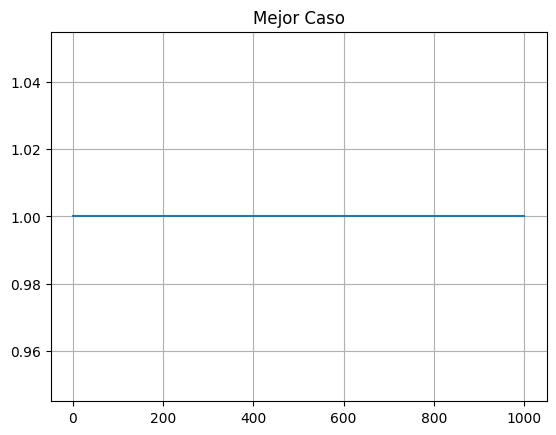

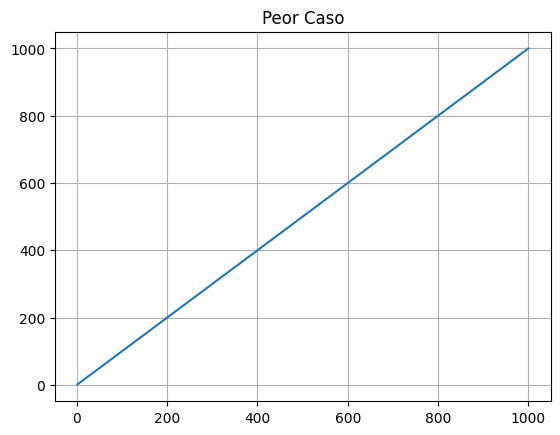

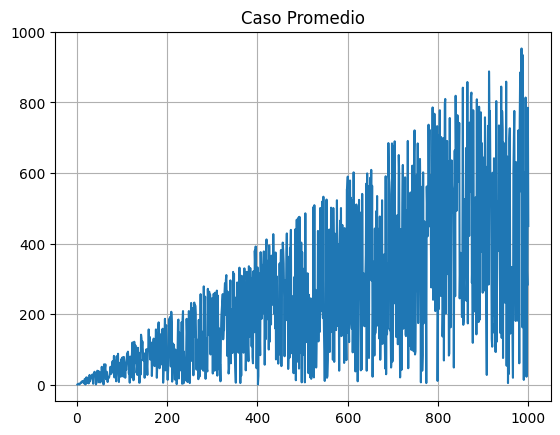

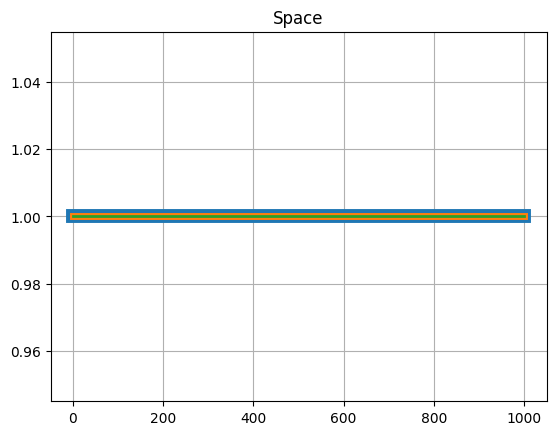

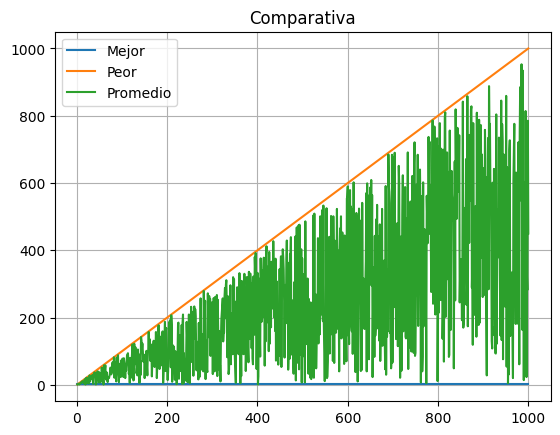

In [82]:
MAX = 1000
arr = create_node_arr(MAX, 0, 0, MAX)
aux = []
x = []
y_mejor = []
y_peor = []
y_prom = []

y_mejor_space = []
y_peor_space = []
y_prom_space = []

for i in range(MAX):
    aux.append(arr[i])
    x.append(len(aux))
    sought = 0 # <--------------------
    index, time, space = linear_search_iterative(aux, sought)
    y_mejor.append(time)
    y_mejor_space.append(space)
    sought = i # <--------------------
    index, time, space = linear_search_iterative(aux, sought)
    y_peor.append(time)
    y_peor_space.append(space)
    sought = random.randint(0, i) # <--------------------
    index, time, space = linear_search_iterative(aux, sought)
    y_prom.append(time)
    y_prom_space.append(space)

casos = [{"titulo": "Mejor Caso", "datos_y": y_mejor, "etiqueta": "Mejor"}, {"titulo": "Peor Caso", "datos_y": y_peor, "etiqueta": "Peor"}, {"titulo": "Caso Promedio", "datos_y": y_prom, "etiqueta": "Promedio"}]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(x, case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Space")
plt.plot(x, y_mejor_space, linewidth=10)
plt.plot(x, y_peor_space, linewidth=5)
plt.plot(x, y_prom_space, linewidth=2)
plt.grid(True)
plt.show()

plt.title("Comparativa")
for case in casos:
    plt.plot(x, case["datos_y"], label=case["etiqueta"])

plt.grid(True)
plt.legend()
plt.show()

## **Búsqueda Lineal (Recursiva)**

### **Algoritmo**

In [ ]:
                                                                            # Temporal      Espacial
def linear_search_recursive(arr, sought, index, time, space):               # n             n
    time += 1
    space += 1
    n = len(arr)                                                            # 4             3
    if index >= n:                                                          # 5             1
        return -1, time, space                                              # 2
    if arr[index].value == sought:                                          # 6             1
        return index, time, space                                           # 2
    return linear_search_recursive(arr, sought, index + 1, time, space)     # 9*(n-1)       (n-1)
                                                                            # 9n+6          n+4     <---- Peor Caso
                                                                            # 9n/2+3        n/2+2   <---- Caso Promedio
                                                                            # 17            4       <---- Mejor Caso

def linear_search_recursive_inter(arr, sought):
    return linear_search_recursive(arr, sought, 0, 0, 0)

### **Prueba de Búsqueda Lineal (Recursiva)**

In [84]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
print(arr)
sought = random.randint(0, MAX)
index, times, space = linear_search_recursive_inter(arr, sought)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 1 -> 20, Nodo 2 -> 19, Nodo 3 -> 18, Nodo 4 -> 17, Nodo 5 -> 16, Nodo 6 -> 15, Nodo 7 -> 14, Nodo 8 -> 13, Nodo 9 -> 12, Nodo 10 -> 11, Nodo 11 -> 10, Nodo 12 -> 9, Nodo 13 -> 8, Nodo 14 -> 7, Nodo 15 -> 6, Nodo 16 -> 5, Nodo 17 -> 4, Nodo 18 -> 3, Nodo 19 -> 2, Nodo 20 -> 1]
Nodo con el valor buscado 20 encontrado en la posición 0


### **Casos de Búsqueda Lineal (Recursiva)**

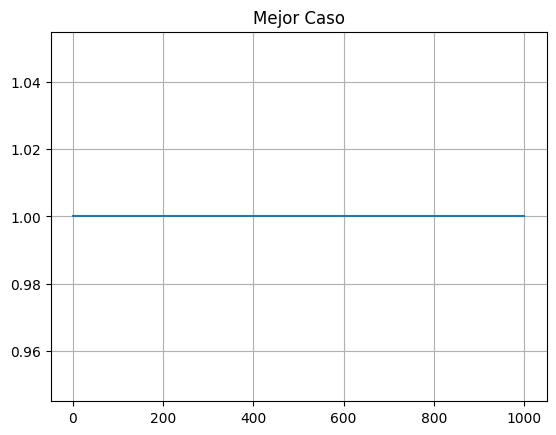

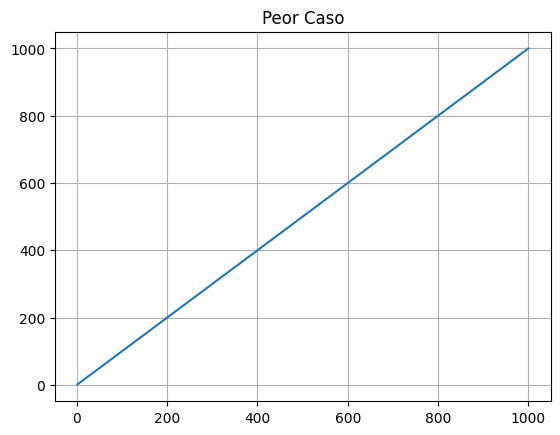

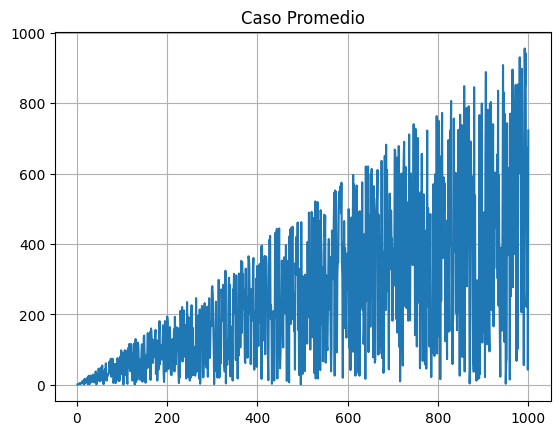

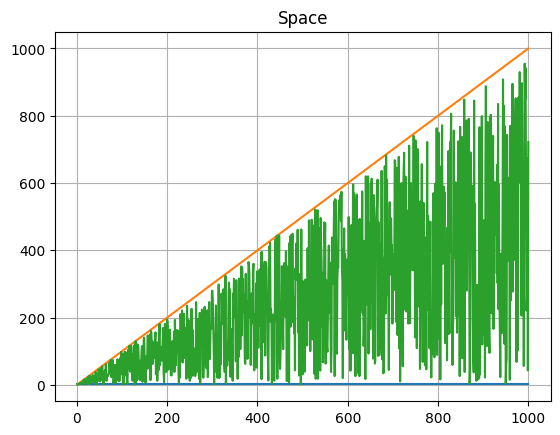

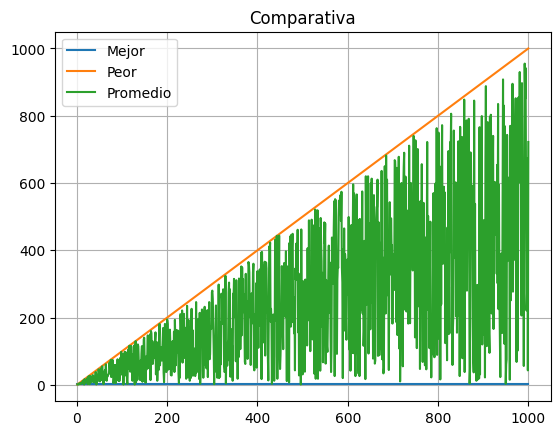

In [85]:
MAX = 1000
arr = create_node_arr(MAX, 0, 0, MAX)
aux = []
x = []
y_mejor = []
y_peor = []
y_prom = []

y_mejor_space = []
y_peor_space = []
y_prom_space = []

for i in range(MAX):
    aux.append(arr[i])
    x.append(len(aux))
    sought = 0 # <----------------------------
    index, time, space = linear_search_recursive_inter(aux, sought)
    y_mejor.append(time)
    y_mejor_space.append(space)
    sought = i # <----------------------------
    index, time, space = linear_search_recursive_inter(aux, sought)
    y_peor.append(time)
    y_peor_space.append(space)
    sought = random.randint(0, i) # <----------------------------
    index, time, space = linear_search_recursive_inter(aux, sought)
    y_prom.append(time)
    y_prom_space.append(space)

casos = [("Mejor Caso", y_mejor), ("Peor Caso", y_peor), ("Caso Promedio", y_prom)]

for titulo, datos_y in casos:
    plt.title(titulo)
    plt.plot(x, datos_y)
    plt.grid(True)
    plt.show()

plt.title("Space")
plt.plot(x, y_mejor_space)
plt.plot(x, y_peor_space)
plt.plot(x, y_prom_space)
plt.grid(True)
plt.show()

plt.title("Comparativa")
plt.plot(x, y_mejor, label="Mejor")
plt.plot(x, y_peor, label="Peor")
plt.plot(x, y_prom, label="Promedio")
plt.grid(True)
plt.legend()
plt.show()

## **Búsqueda Binaria (Iterativa)**

### **Algoritmo**

In [ ]:
def binary_search_iterative(arr, sought):       # Temporal      Espacial
    time = 0
    space = 0
    low = 0                                     # 3             2
    high = len(arr) - 1                         # 6             2
    space += 1
    while low <= high:                          # 4logn         1
        time += 1
        mid = (low + high) // 2                 # 7logn         2
        if arr[mid].value == sought:            # 6logn         2
            return mid, time, space             # 2logn
        elif arr[mid].value < sought:           # 6logn         1
            low = mid + 1                       # 5logn         2
        else:                                   # 1logn
            high = mid - 1                      # 5logn         2
    return -1, time, space                      # 2
                                # Peor Caso:      32logn+11     14
                            # Caso Promedio:      16logn11      12
                               # Mejor Caso:      24            9

### **Prueba de Búsqueda Binaria (Iterativa) con Bubble Sort**

In [87]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
time = bubble_sort(arr)
sought = MAX // 2
index, time, space = binary_search_iterative(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 10 encontrado en la posición 9


### **Casos de Búsqueda Binaria (Iterativa) con Bubble Sort**

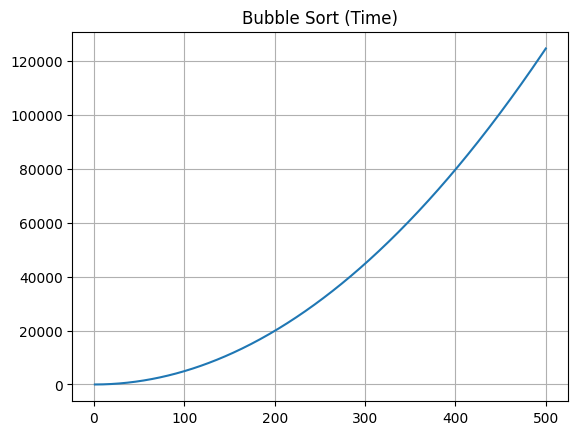

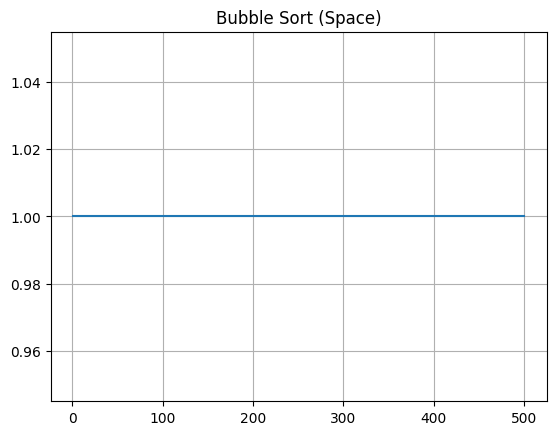

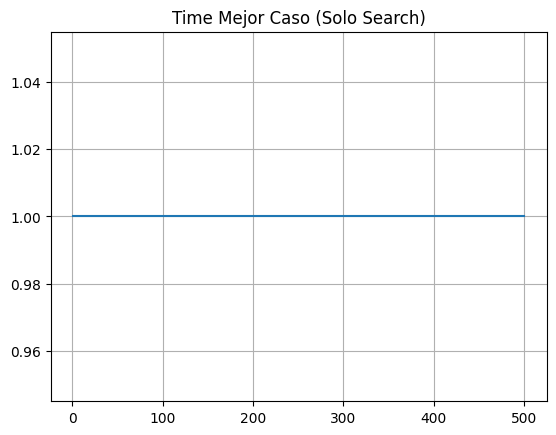

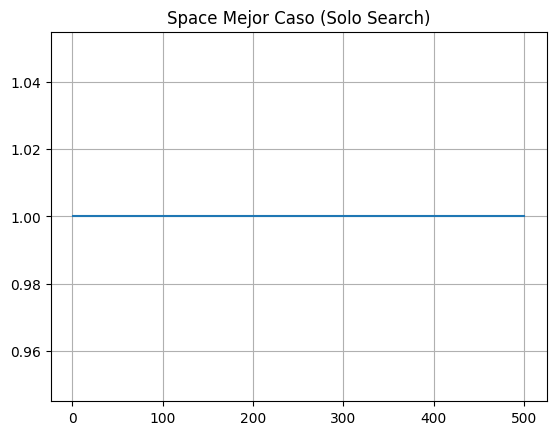

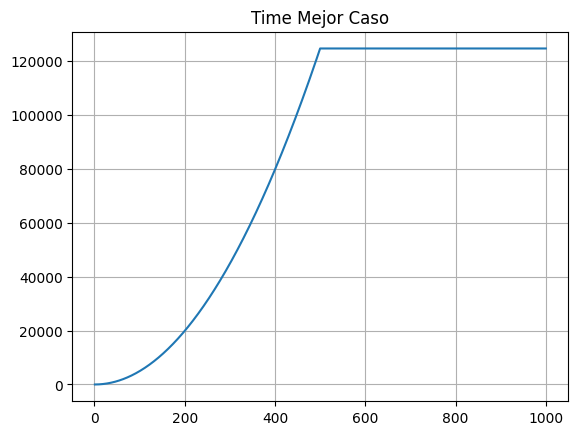

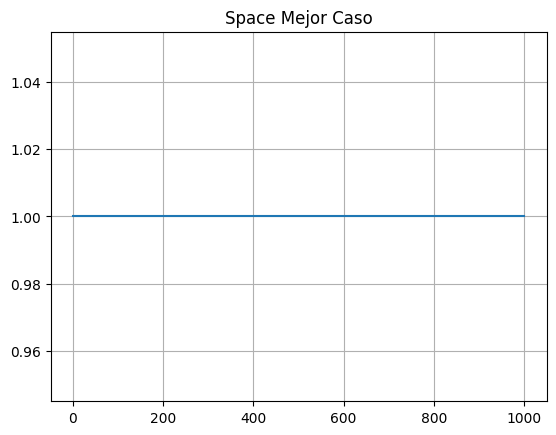

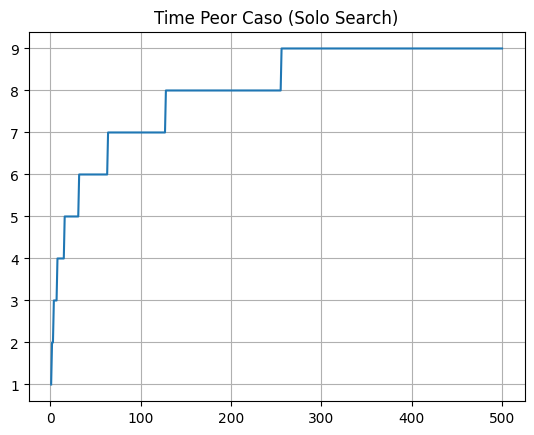

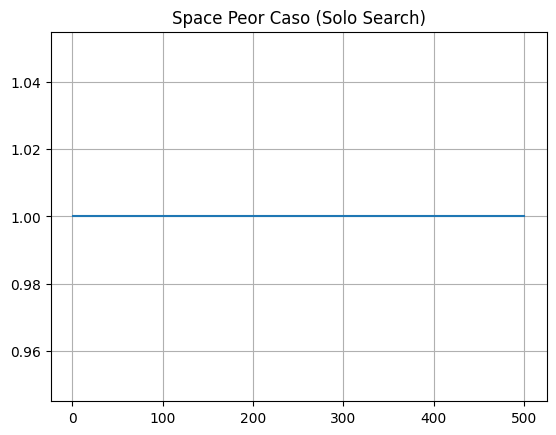

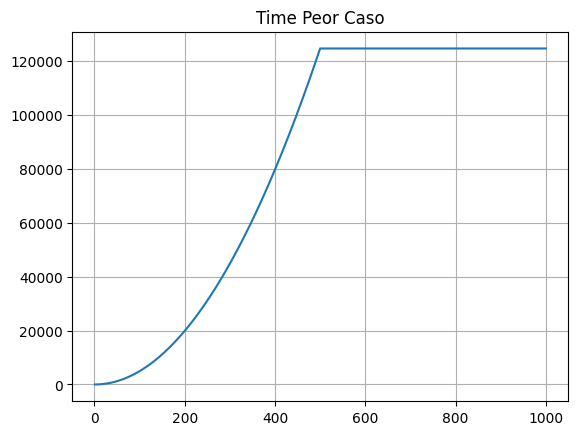

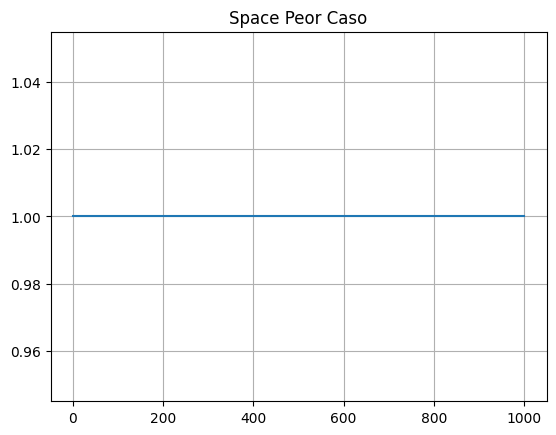

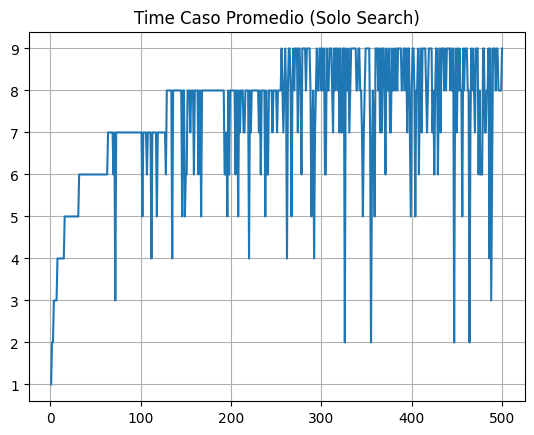

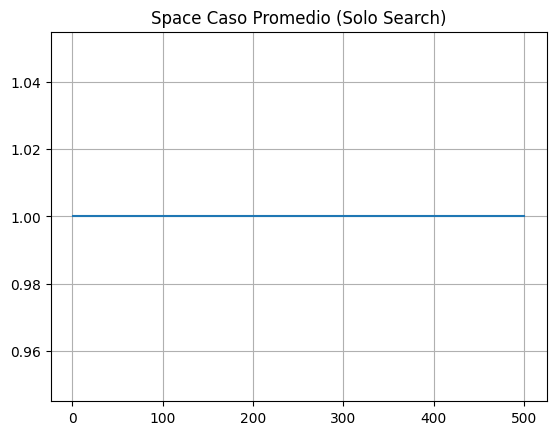

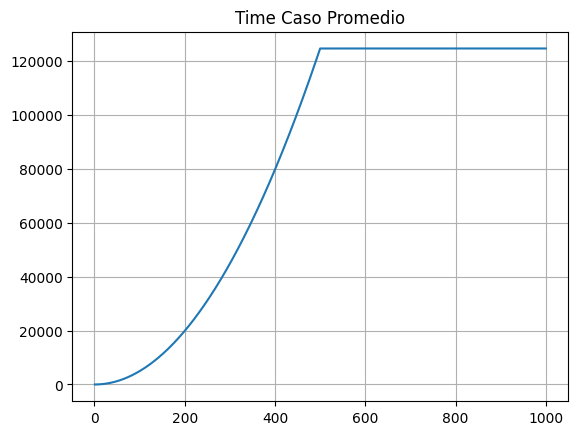

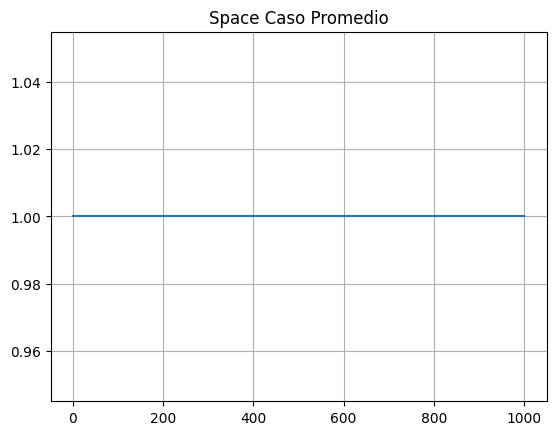

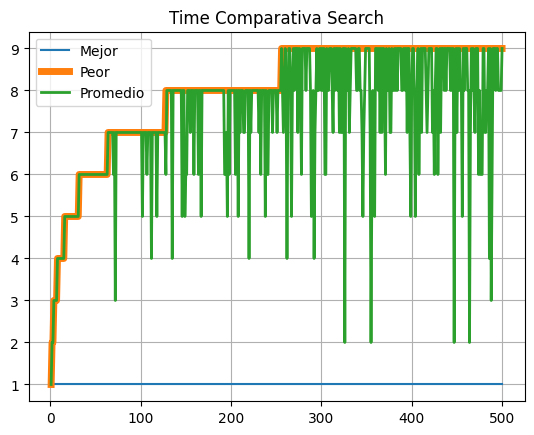

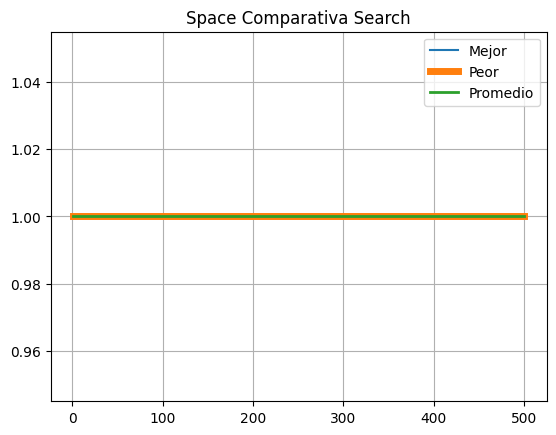

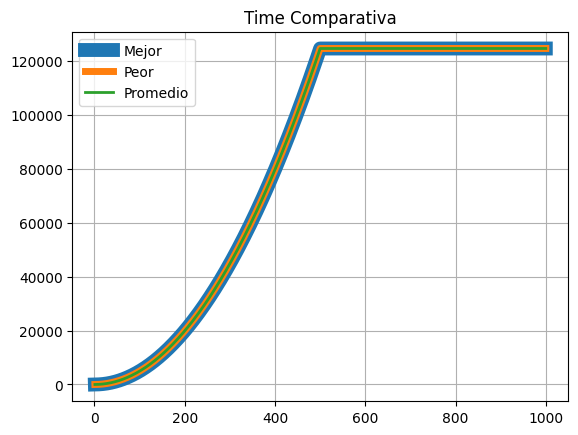

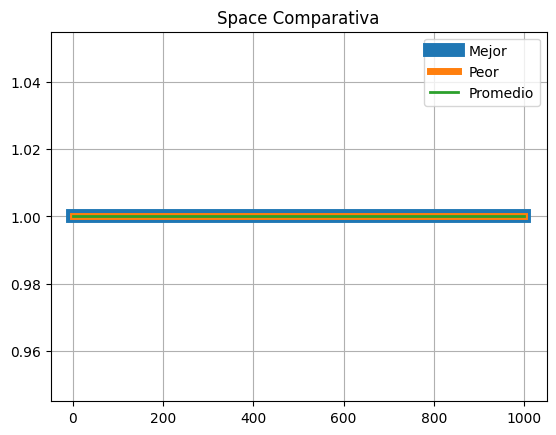

In [88]:
MAX = 500

x = []
x_sort = []
x_search = []

y_mejor_time = []
y_peor_time = []
y_prom_time = []

y_mejor_space = []
y_peor_space = []
y_prom_space = []

y_sort_time = []
y_sort_space = []

y_search_mejor_time = []
y_search_peor_time = []
y_search_prom_time = []

y_search_mejor_space = []
y_search_peor_space = []
y_search_prom_space = []

arr = create_node_arr(MAX, 1, 0, MAX)
aux = []
aux_aux = []

for i in range(MAX):

    aux.append(arr[i])
    x_sort.append(len(aux))

    time_sort, space_sort = bubble_sort(aux)

    y_sort_time.append(time_sort)
    y_sort_space.append(space_sort)

x_last = len(aux)
y_last = time_sort
y_last_space = space_sort

plt.title("Bubble Sort (Time)")
plt.plot(x_sort, y_sort_time)
plt.grid(True)
plt.show()

plt.title("Bubble Sort (Space)")
plt.plot(x_sort, y_sort_space)
plt.grid(True)
plt.show()

for i in range(MAX):
    aux_aux.append(aux[i])
    x_search.append(len(aux_aux))

    sought = aux_aux[i // 2].value
    index, time_search, space_search = binary_search_iterative(aux_aux, sought)
    y_search_mejor_time.append(time_search)
    y_search_mejor_space.append(space_search)

    sought = MAX * 2
    index, time_search, space_search = binary_search_iterative(aux_aux, sought)
    y_search_peor_time.append(time_search)
    y_search_peor_space.append(space_search)

    sought = random.randint(0, MAX)
    index, time_search, space_search = binary_search_iterative(aux_aux, sought)
    y_search_prom_time.append(time_search)
    y_search_prom_space.append(space_search)

x = x_sort[:]

y_mejor_time = y_sort_time[:]
y_peor_time = y_sort_time[:]
y_prom_time = y_sort_time[:]

y_mejor_space = y_sort_space[:]
y_peor_space = y_sort_space[:]
y_prom_space = y_sort_space[:]

for i in range(MAX):
    x.append(x_last + x_search[i])
    
    y_mejor_time.append(y_last + y_search_mejor_time[i])
    y_peor_time.append(y_last + y_search_peor_time[i])
    y_prom_time.append(y_last + y_search_prom_time[i])

    y_mejor_space.append(y_search_mejor_space[i])
    y_peor_space.append(y_search_peor_space[i])
    y_prom_space.append(y_search_prom_space[i])

casos = [
    {"titulo": "Time Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor_time},
    {"titulo": "Space Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor_space},
    {"titulo": "Time Mejor Caso", "datos_x": x, "datos_y": y_mejor_time},
    {"titulo": "Space Mejor Caso", "datos_x": x, "datos_y": y_mejor_space},

    {"titulo": "Time Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor_time},
    {"titulo": "Space Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor_space},
    {"titulo": "Time Peor Caso", "datos_x": x, "datos_y": y_peor_time},
    {"titulo": "Space Peor Caso", "datos_x": x, "datos_y": y_peor_space},
    
    {"titulo": "Time Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom_time},
    {"titulo": "Space Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom_space},
    {"titulo": "Time Caso Promedio", "datos_x": x, "datos_y": y_prom_time},
    {"titulo": "Space Caso Promedio", "datos_x": x, "datos_y": y_prom_space},
]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(case["datos_x"], case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Time Comparativa Search")
plt.plot(x_search, y_search_mejor_time, label="Mejor")
plt.plot(x_search, y_search_peor_time, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom_time, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Space Comparativa Search")
plt.plot(x_search, y_search_mejor_space, label="Mejor")
plt.plot(x_search, y_search_peor_space, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom_space, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Time Comparativa")
plt.plot(x, y_mejor_time, label="Mejor", linewidth=10)
plt.plot(x, y_peor_time, label="Peor", linewidth=5)
plt.plot(x, y_prom_time, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Space Comparativa")
plt.plot(x, y_mejor_space, label="Mejor", linewidth=10)
plt.plot(x, y_peor_space, label="Peor", linewidth=5)
plt.plot(x, y_prom_space, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

### **Prueba de Búsqueda Binaria (Iterativa) con Merge Sort**

In [89]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
time = merge_sort(arr)
sought = MAX // 2
index, time, space = binary_search_iterative(arr, sought)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 10 encontrado en la posición 9


### **Casos de Búsqueda Binaria (Iterativa) con Merge Sort**

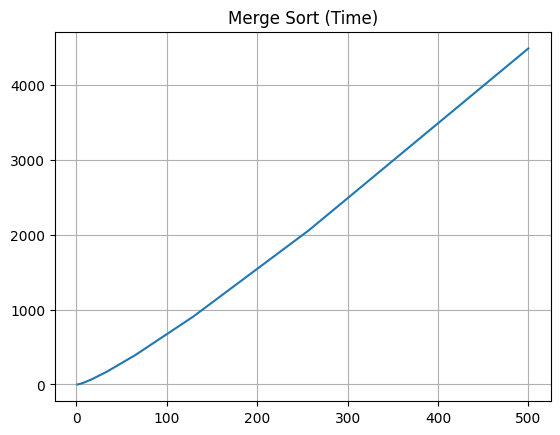

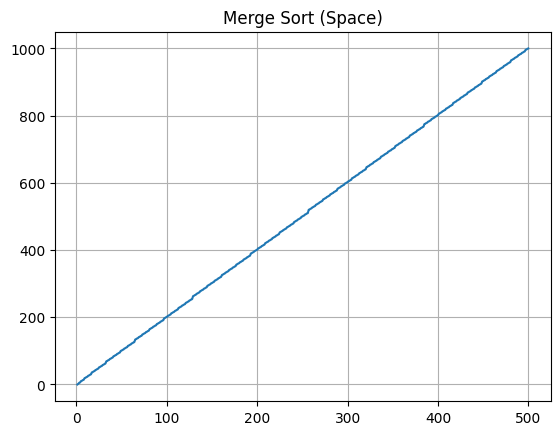

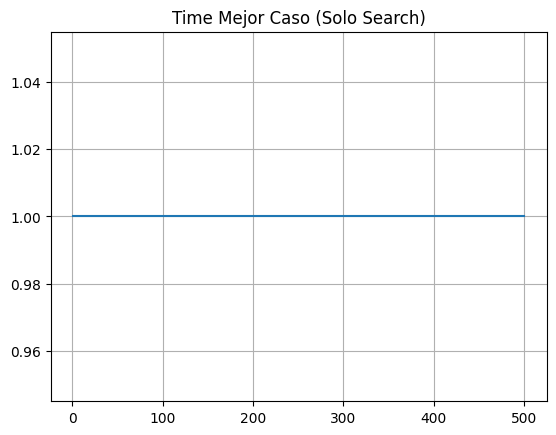

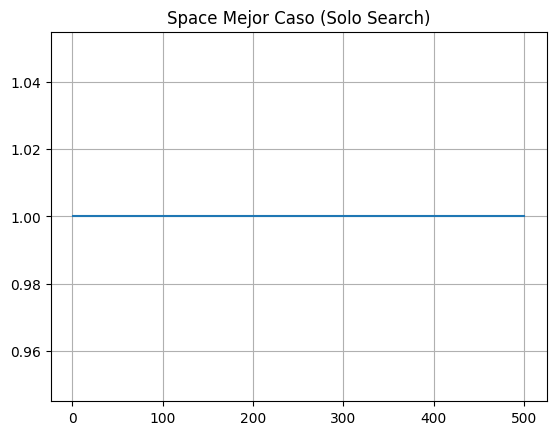

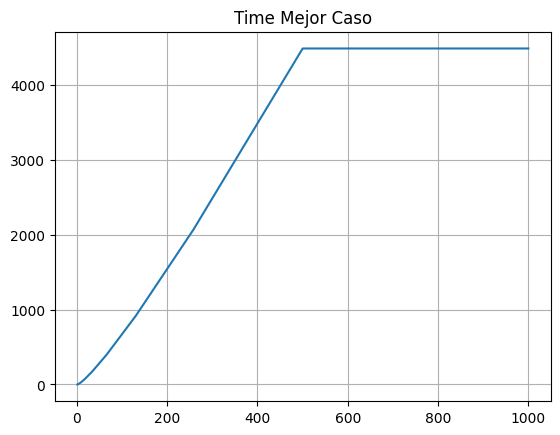

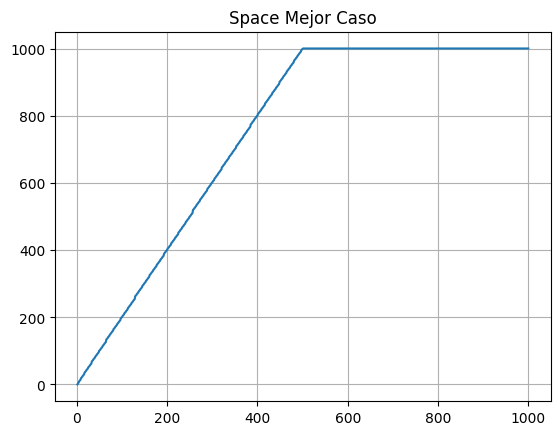

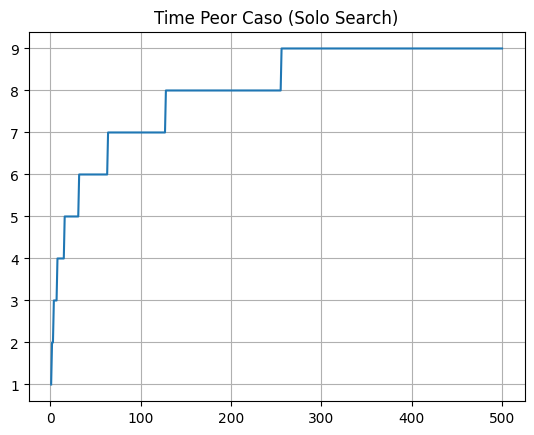

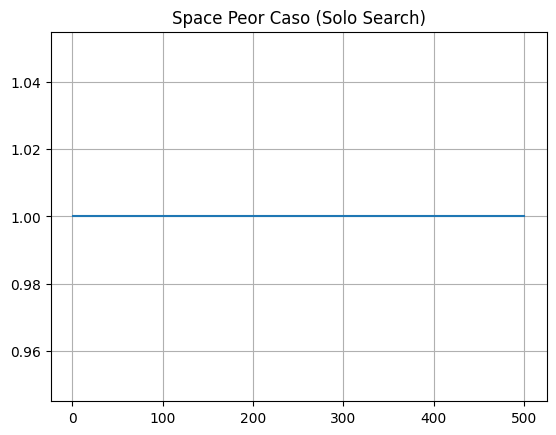

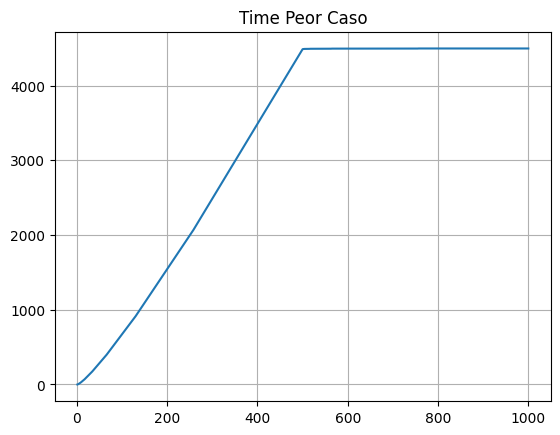

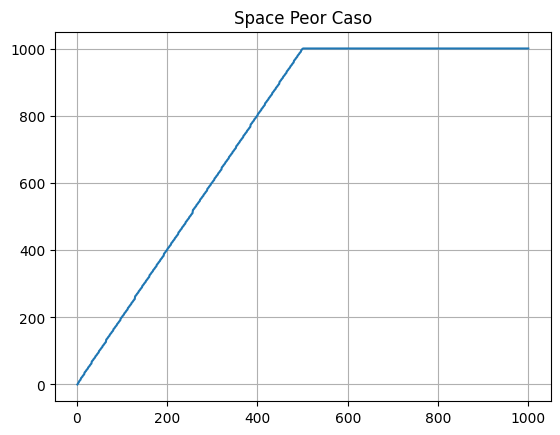

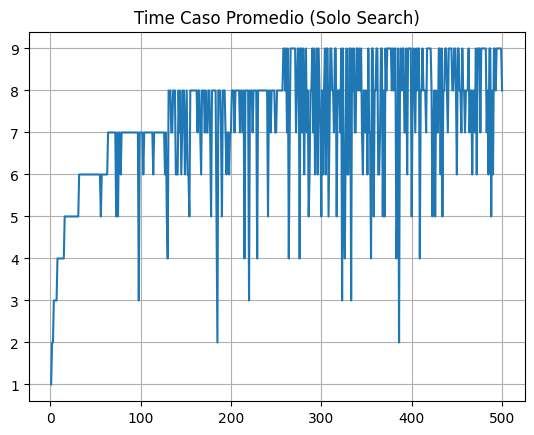

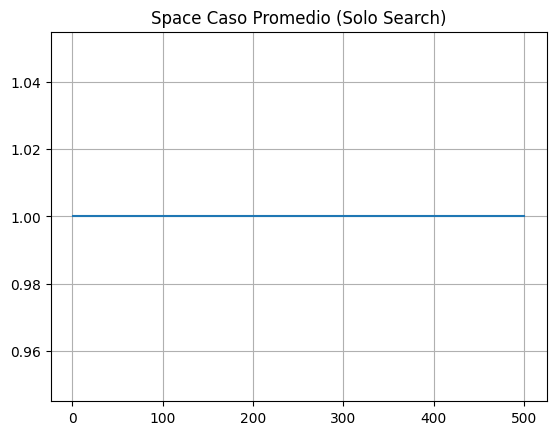

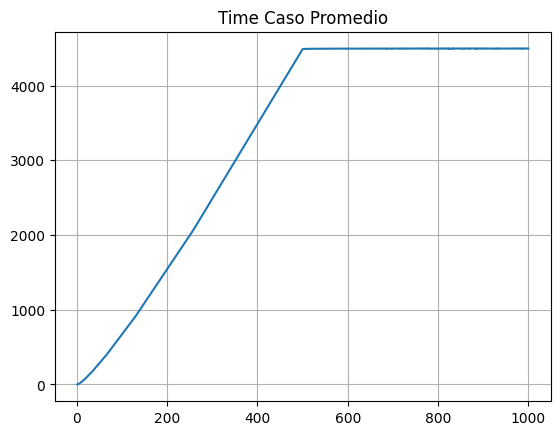

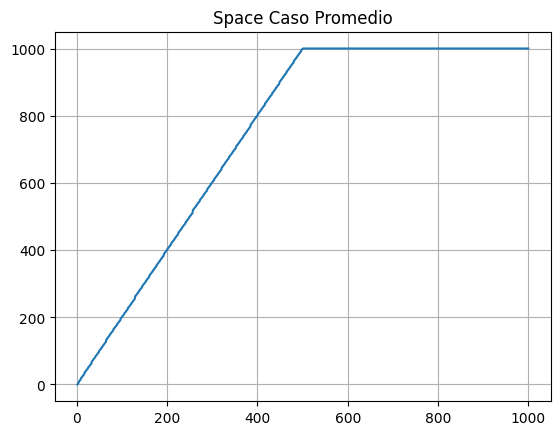

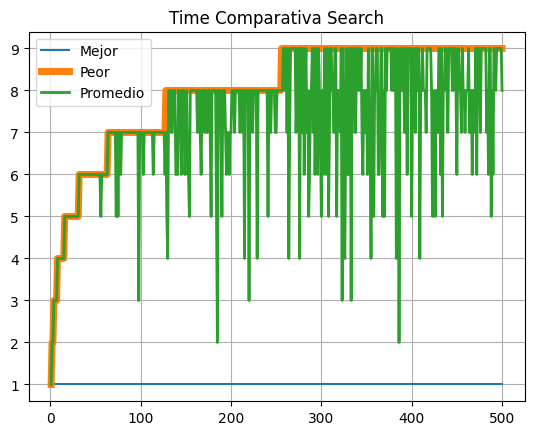

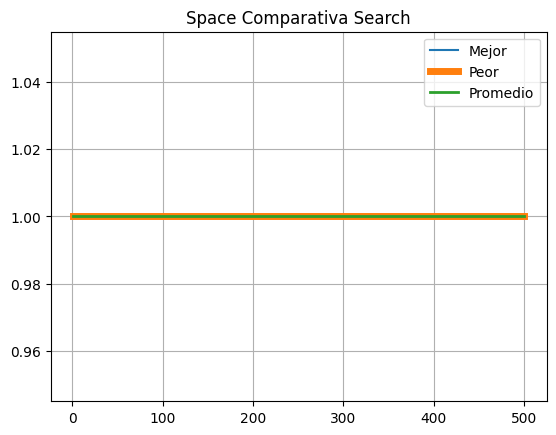

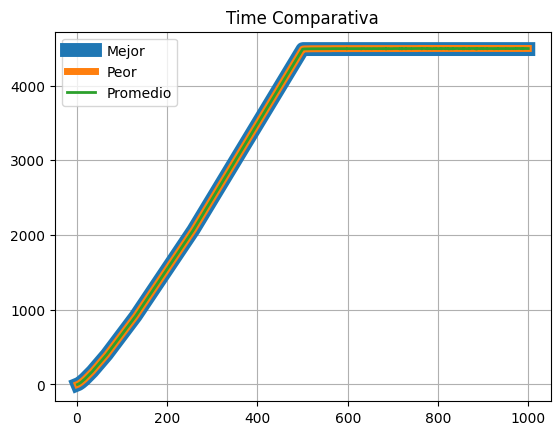

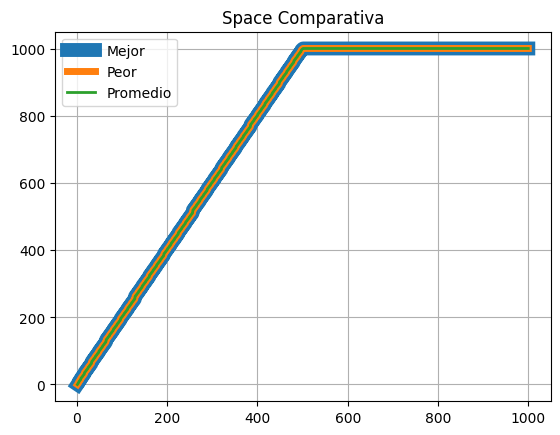

In [90]:
MAX = 500

x = []
x_sort = []
x_search = []

y_mejor_time = []
y_peor_time = []
y_prom_time = []

y_mejor_space = []
y_peor_space = []
y_prom_space = []

y_sort_time = []
y_sort_space = []

y_search_mejor_time = []
y_search_peor_time = []
y_search_prom_time = []

y_search_mejor_space = []
y_search_peor_space = []
y_search_prom_space = []

arr = create_node_arr(MAX, 1, 0, MAX)
aux = []
aux_aux = []

for i in range(MAX):
    aux.append(arr[i])
    x_sort.append(len(aux))

    time_sort, space_sort = merge_sort(aux)

    y_sort_time.append(time_sort)
    y_sort_space.append(space_sort)

x_last = len(aux)
y_last = time_sort
y_last_space = space_sort

plt.title("Merge Sort (Time)")
plt.plot(x_sort, y_sort_time)
plt.grid(True)
plt.show()

plt.title("Merge Sort (Space)")
plt.plot(x_sort, y_sort_space)
plt.grid(True)
plt.show()

for i in range(MAX):
    aux_aux.append(aux[i])
    x_search.append(len(aux_aux))

    sought = aux_aux[i // 2].value
    index, time_search, space_search = binary_search_iterative(aux_aux, sought)
    y_search_mejor_time.append(time_search)
    y_search_mejor_space.append(space_search)

    sought = MAX * 2
    index, time_search, space_search = binary_search_iterative(aux_aux, sought)
    y_search_peor_time.append(time_search)
    y_search_peor_space.append(space_search)

    sought = random.randint(0, MAX)
    index, time_search, space_search = binary_search_iterative(aux_aux, sought)
    y_search_prom_time.append(time_search)
    y_search_prom_space.append(space_search)

x = x_sort[:]

y_mejor_time = y_sort_time[:]
y_peor_time = y_sort_time[:]
y_prom_time = y_sort_time[:]

y_mejor_space = y_sort_space[:]
y_peor_space = y_sort_space[:]
y_prom_space = y_sort_space[:]

for i in range(MAX):
    x.append(x_last + x_search[i])
    
    y_mejor_time.append(y_last + y_search_mejor_time[i])
    y_peor_time.append(y_last + y_search_peor_time[i])
    y_prom_time.append(y_last + y_search_prom_time[i])

    y_mejor_space.append(y_last_space + y_search_mejor_space[i])
    y_peor_space.append(y_last_space + y_search_peor_space[i])
    y_prom_space.append(y_last_space + y_search_prom_space[i])

casos = [
    {"titulo": "Time Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor_time},
    {"titulo": "Space Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor_space},
    {"titulo": "Time Mejor Caso", "datos_x": x, "datos_y": y_mejor_time},
    {"titulo": "Space Mejor Caso", "datos_x": x, "datos_y": y_mejor_space},

    {"titulo": "Time Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor_time},
    {"titulo": "Space Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor_space},
    {"titulo": "Time Peor Caso", "datos_x": x, "datos_y": y_peor_time},
    {"titulo": "Space Peor Caso", "datos_x": x, "datos_y": y_peor_space},
    
    {"titulo": "Time Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom_time},
    {"titulo": "Space Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom_space},
    {"titulo": "Time Caso Promedio", "datos_x": x, "datos_y": y_prom_time},
    {"titulo": "Space Caso Promedio", "datos_x": x, "datos_y": y_prom_space},
]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(case["datos_x"], case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Time Comparativa Search")
plt.plot(x_search, y_search_mejor_time, label="Mejor")
plt.plot(x_search, y_search_peor_time, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom_time, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Space Comparativa Search")
plt.plot(x_search, y_search_mejor_space, label="Mejor")
plt.plot(x_search, y_search_peor_space, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom_space, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Time Comparativa")
plt.plot(x, y_mejor_time, label="Mejor", linewidth=10)
plt.plot(x, y_peor_time, label="Peor", linewidth=5)
plt.plot(x, y_prom_time, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Space Comparativa")
plt.plot(x, y_mejor_space, label="Mejor", linewidth=10)
plt.plot(x, y_peor_space, label="Peor", linewidth=5)
plt.plot(x, y_prom_space, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

## **Búsqueda Binaria (Recursiva)**

### **Algoritmo**

In [ ]:
                                                                                    # Temporal          Espacial
def binary_search_recursive(arr, sought, low, high, time, space):                   # logn
    time += 1
    space += 1
    if low > high:                                                                  # 4logn             logn
        return -1, time, space                                                      # 2logn
    mid = (low + high) // 2                                                         # 7logn             2logn
    if arr[mid].value == sought:                                                    # 6logn             2logn
        return mid, time, space                                                     # 2logn
    elif arr[mid].value < sought:                                                   # 6logn             logn
        return binary_search_recursive(arr, sought, mid + 1, high, time, space)     # log(n/2)
    else:                                                                           # log(n)
        return binary_search_recursive(arr, sought, low, mid - 1, time, space)      # log(n/2)
                                                                # Peor Caso:          28logn-2log2      6logn
                                                                # Caso Promedio:      14logn-log2       3logn
                                                                # Mejor Caso:         21                6

### **Prueba de Búsqueda Binaria (Recursiva) con Bubble Sort**

In [92]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
time, space = bubble_sort(arr)
sought = random.randint(0, MAX)
index, time, space = binary_search_recursive(arr, sought, 0, len(arr) - 1, 0, 0)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 12 encontrado en la posición 11


### **Casos de Búsqueda Binaria (Recursiva) con Bubble Sort**

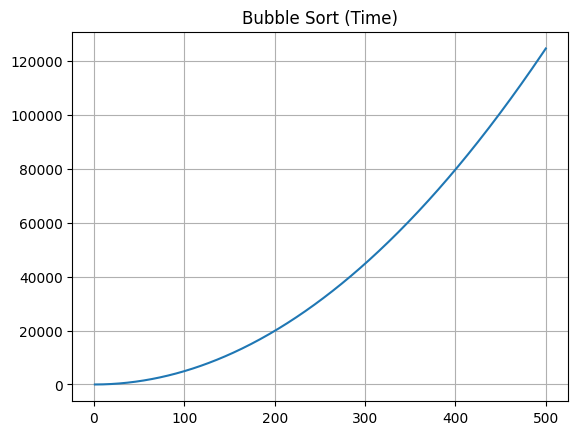

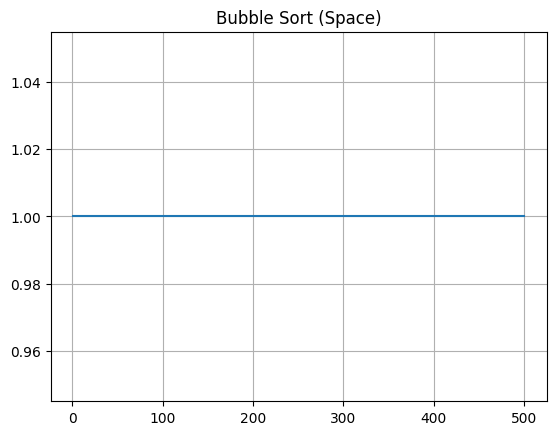

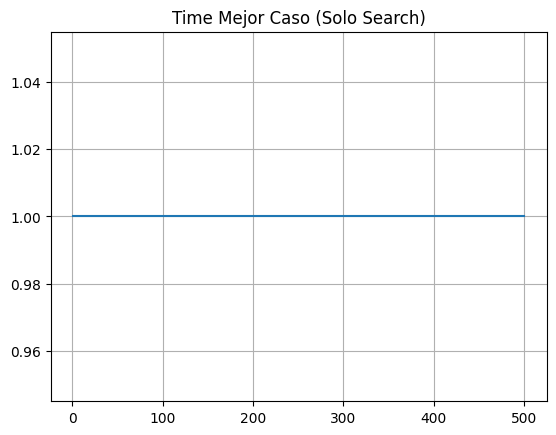

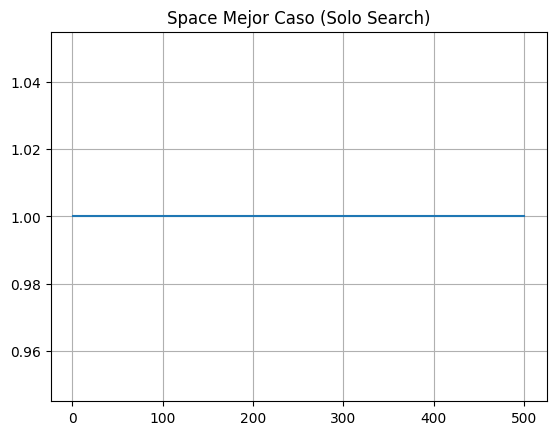

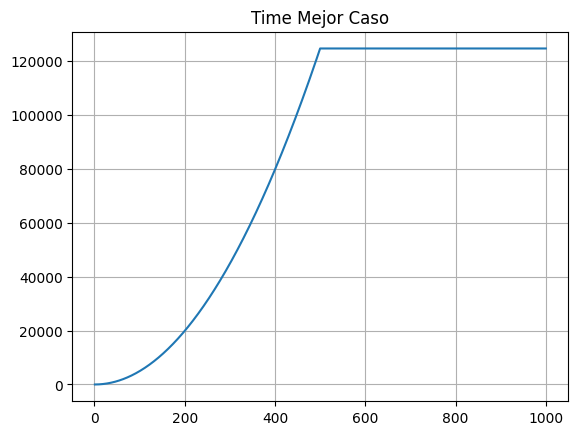

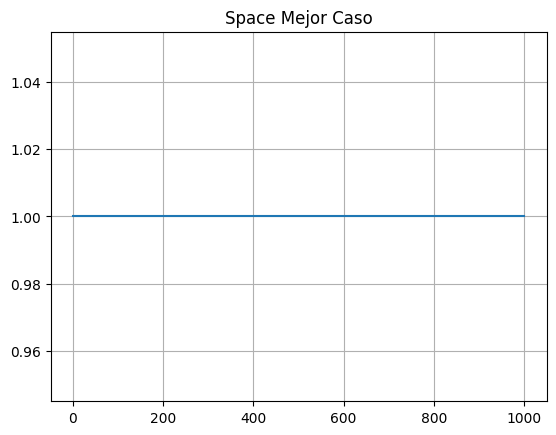

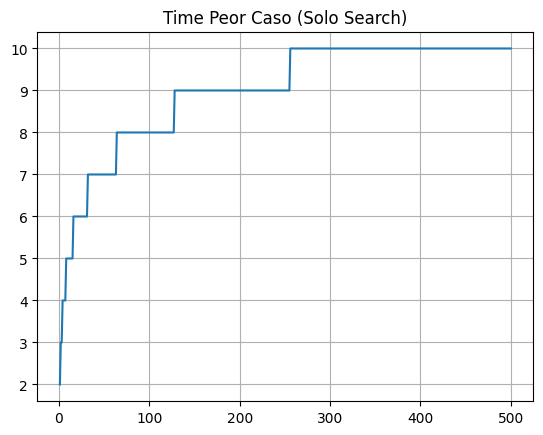

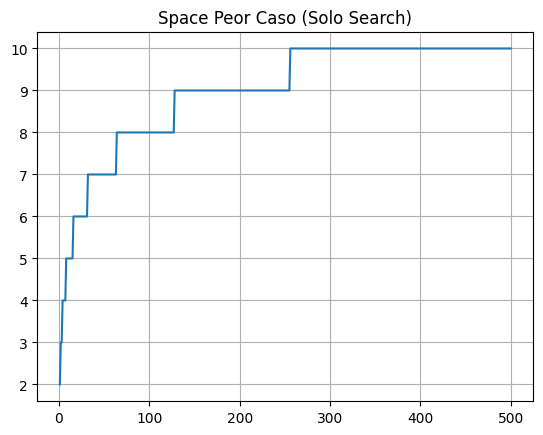

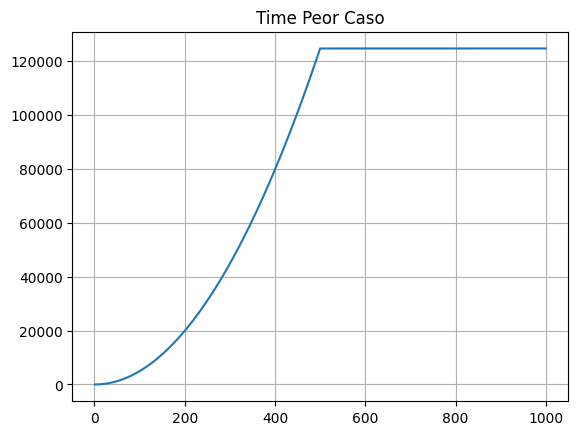

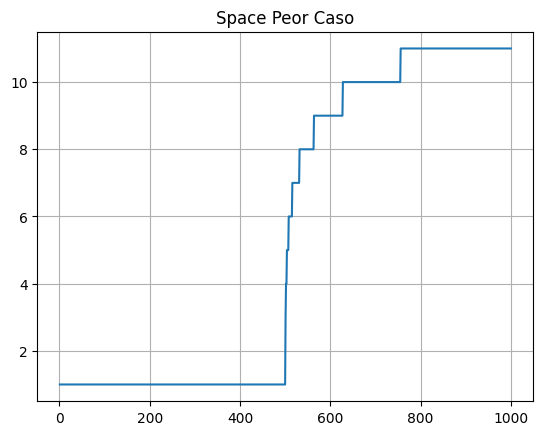

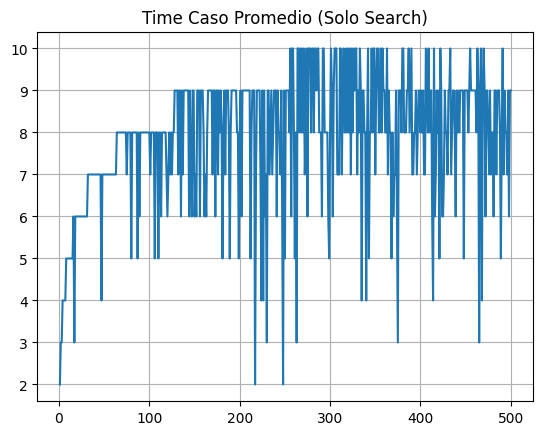

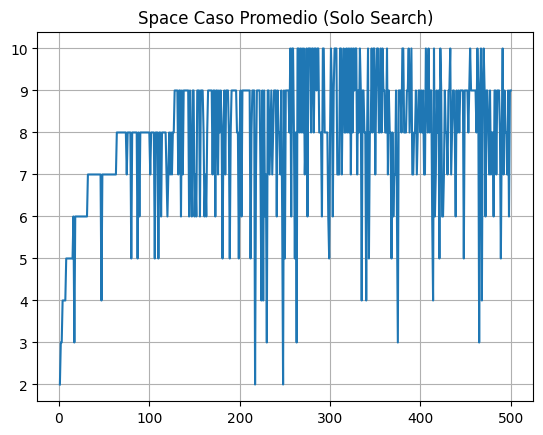

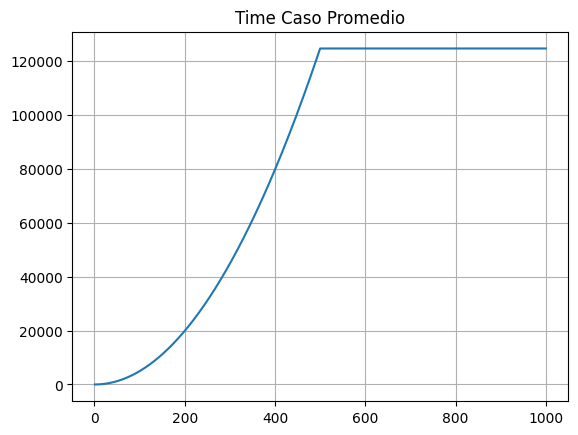

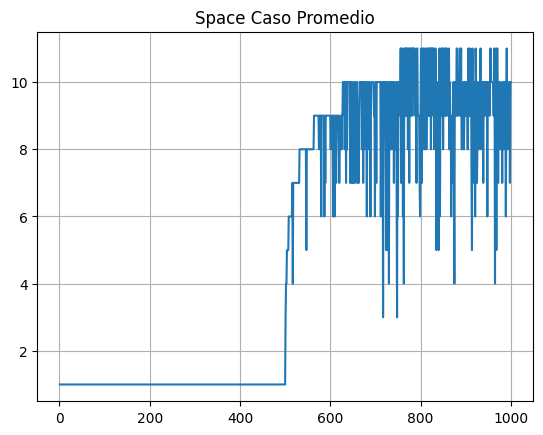

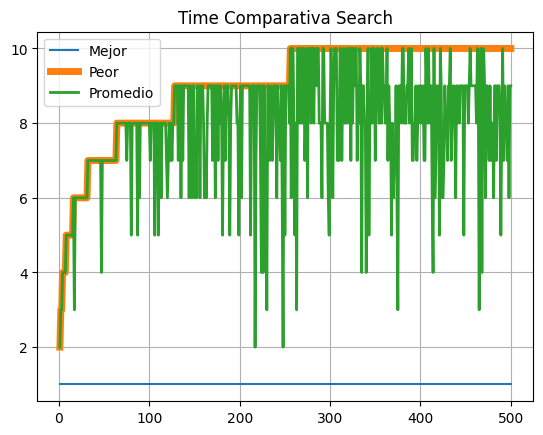

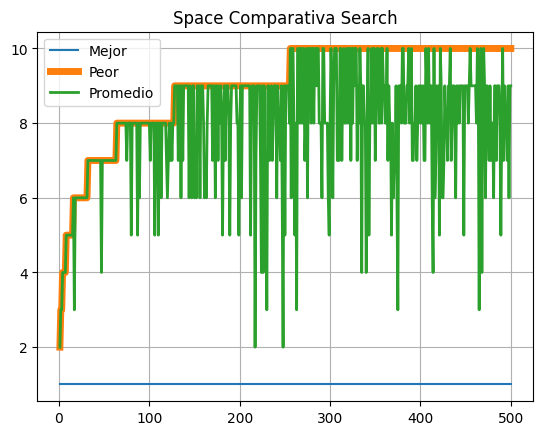

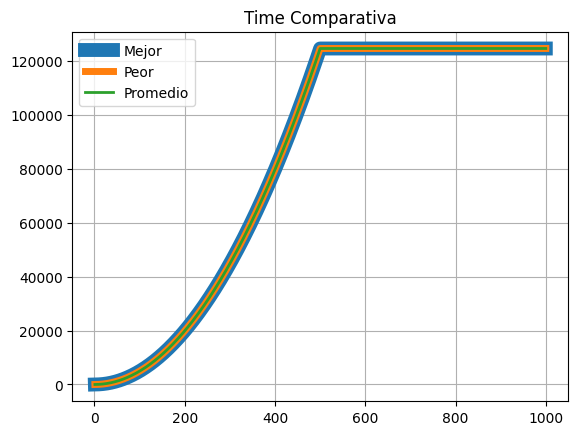

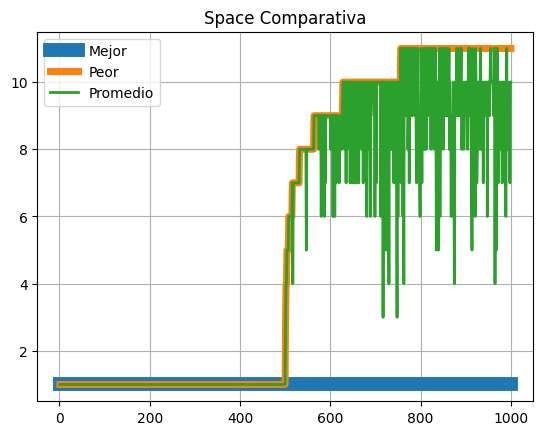

In [93]:
MAX = 500

x = []
x_sort = []
x_search = []

y_mejor_time = []
y_peor_time = []
y_prom_time = []

y_mejor_space = []
y_peor_space = []
y_prom_space = []

y_sort_time = []
y_sort_space = []

y_search_mejor_time = []
y_search_peor_time = []
y_search_prom_time = []

y_search_mejor_space = []
y_search_peor_space = []
y_search_prom_space = []

arr = create_node_arr(MAX, 1, 0, MAX)
aux = []
aux_aux = []

for i in range(MAX):

    aux.append(arr[i])
    x_sort.append(len(aux))

    time_sort, space_sort = bubble_sort(aux)

    y_sort_time.append(time_sort)
    y_sort_space.append(space_sort)

x_last = len(aux)
y_last = time_sort
y_last_space = space_sort

plt.title("Bubble Sort (Time)")
plt.plot(x_sort, y_sort_time)
plt.grid(True)
plt.show()

plt.title("Bubble Sort (Space)")
plt.plot(x_sort, y_sort_space)
plt.grid(True)
plt.show()

for i in range(MAX):
    aux_aux.append(aux[i])
    x_search.append(len(aux_aux))

    sought = aux_aux[i // 2].value
    index, time_search, space_search = binary_search_recursive(aux_aux, sought, 0, len(aux_aux) - 1, 0, 0)
    y_search_mejor_time.append(time_search)
    y_search_mejor_space.append(space_search)

    sought = MAX * 2
    index, time_search, space_search = binary_search_recursive(aux_aux, sought, 0, len(aux_aux) - 1, 0, 0)
    y_search_peor_time.append(time_search)
    y_search_peor_space.append(space_search)

    sought = random.randint(0, MAX)
    index, time_search, space_search = binary_search_recursive(aux_aux, sought, 0, len(aux_aux) - 1, 0, 0)
    y_search_prom_time.append(time_search)
    y_search_prom_space.append(space_search)

x = x_sort[:]

y_mejor_time = y_sort_time[:]
y_peor_time = y_sort_time[:]
y_prom_time = y_sort_time[:]

y_mejor_space = y_sort_space[:]
y_peor_space = y_sort_space[:]
y_prom_space = y_sort_space[:]

for i in range(MAX):
    x.append(x_last + x_search[i])
    
    y_mejor_time.append(y_last + y_search_mejor_time[i])
    y_peor_time.append(y_last + y_search_peor_time[i])
    y_prom_time.append(y_last + y_search_prom_time[i])

    y_mejor_space.append(y_search_mejor_space[i])
    y_peor_space.append(y_last_space + y_search_peor_space[i])
    y_prom_space.append(y_last_space + y_search_prom_space[i])

casos = [
    {"titulo": "Time Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor_time},
    {"titulo": "Space Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor_space},
    {"titulo": "Time Mejor Caso", "datos_x": x, "datos_y": y_mejor_time},
    {"titulo": "Space Mejor Caso", "datos_x": x, "datos_y": y_mejor_space},

    {"titulo": "Time Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor_time},
    {"titulo": "Space Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor_space},
    {"titulo": "Time Peor Caso", "datos_x": x, "datos_y": y_peor_time},
    {"titulo": "Space Peor Caso", "datos_x": x, "datos_y": y_peor_space},
    
    {"titulo": "Time Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom_time},
    {"titulo": "Space Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom_space},
    {"titulo": "Time Caso Promedio", "datos_x": x, "datos_y": y_prom_time},
    {"titulo": "Space Caso Promedio", "datos_x": x, "datos_y": y_prom_space},
]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(case["datos_x"], case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Time Comparativa Search")
plt.plot(x_search, y_search_mejor_time, label="Mejor")
plt.plot(x_search, y_search_peor_time, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom_time, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Space Comparativa Search")
plt.plot(x_search, y_search_mejor_space, label="Mejor")
plt.plot(x_search, y_search_peor_space, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom_space, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Time Comparativa")
plt.plot(x, y_mejor_time, label="Mejor", linewidth=10)
plt.plot(x, y_peor_time, label="Peor", linewidth=5)
plt.plot(x, y_prom_time, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Space Comparativa")
plt.plot(x, y_mejor_space, label="Mejor", linewidth=10)
plt.plot(x, y_peor_space, label="Peor", linewidth=5)
plt.plot(x, y_prom_space, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

### **Prueba de Búsqueda Binaria (Recursiva) con Merge Sort**

In [94]:
MAX = 20
arr = create_node_arr(MAX, 1, 0, MAX)
time, space = merge_sort(arr)
sought = random.randint(0, MAX)
index, time, space = binary_search_recursive(arr, sought, 0, len(arr) - 1, 0, 0)
print(arr)
print("Nodo con el valor buscado", sought, "encontrado en la posición", index)

[Nodo 20 -> 1, Nodo 19 -> 2, Nodo 18 -> 3, Nodo 17 -> 4, Nodo 16 -> 5, Nodo 15 -> 6, Nodo 14 -> 7, Nodo 13 -> 8, Nodo 12 -> 9, Nodo 11 -> 10, Nodo 10 -> 11, Nodo 9 -> 12, Nodo 8 -> 13, Nodo 7 -> 14, Nodo 6 -> 15, Nodo 5 -> 16, Nodo 4 -> 17, Nodo 3 -> 18, Nodo 2 -> 19, Nodo 1 -> 20]
Nodo con el valor buscado 12 encontrado en la posición 11


### **Casos de Búsqueda Binaria (Recursiva) con Merge Sort**

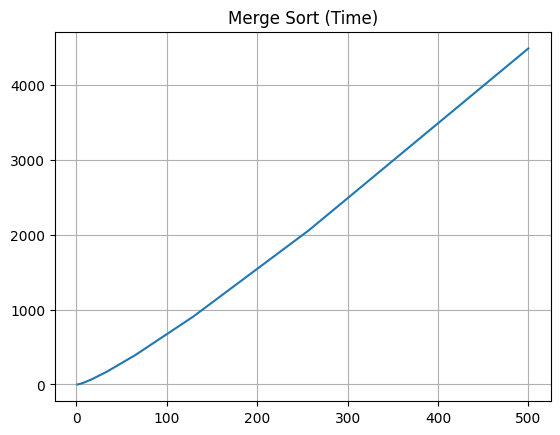

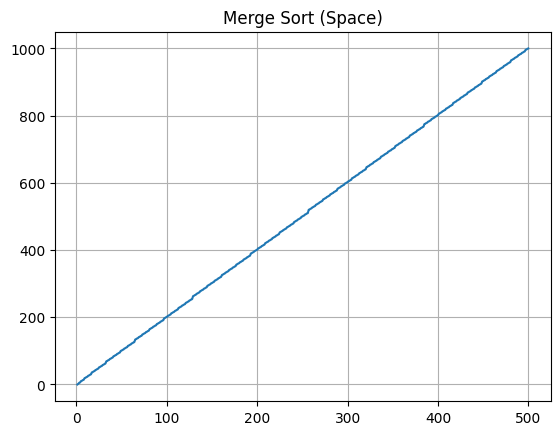

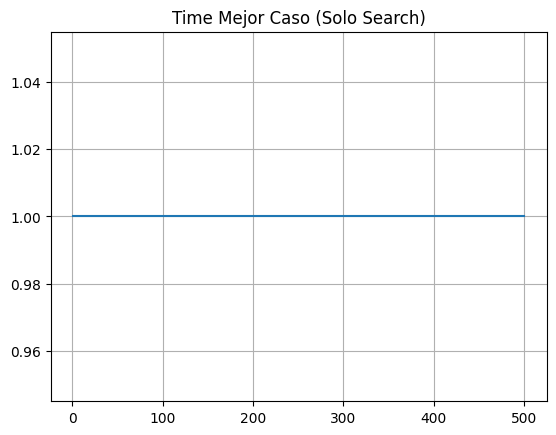

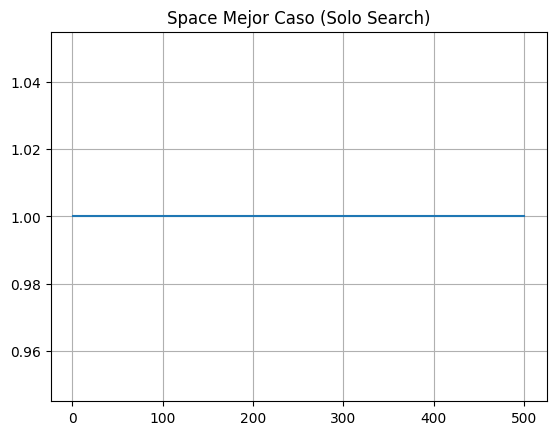

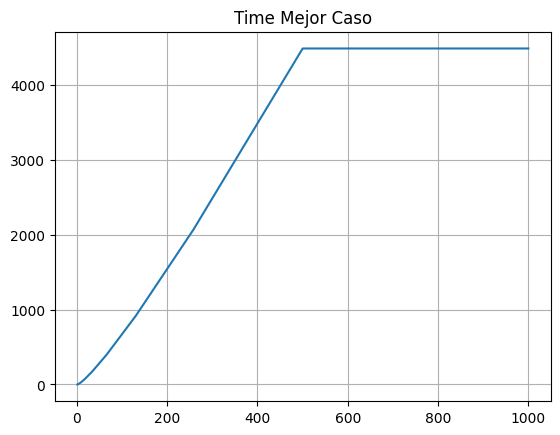

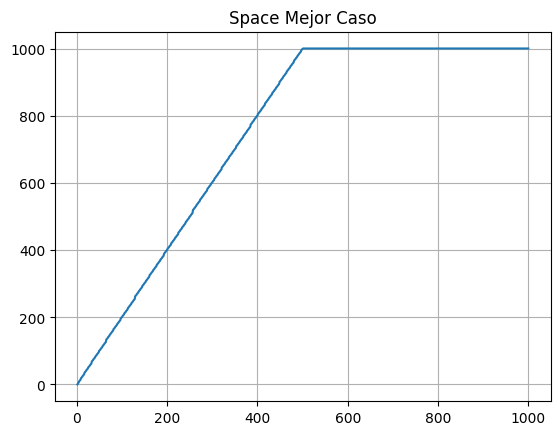

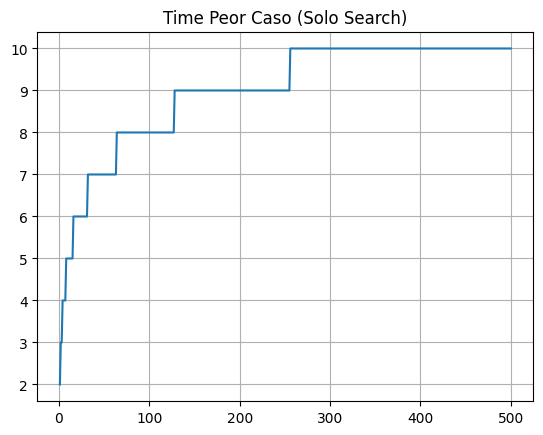

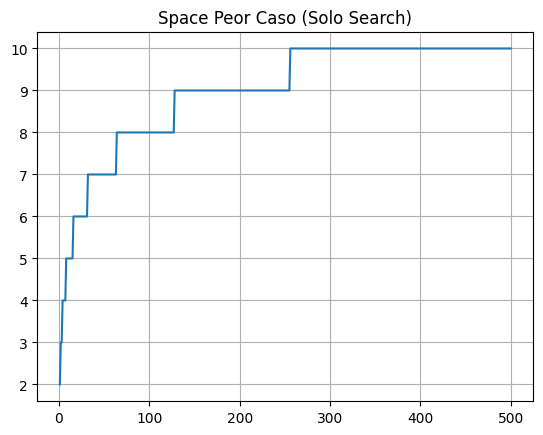

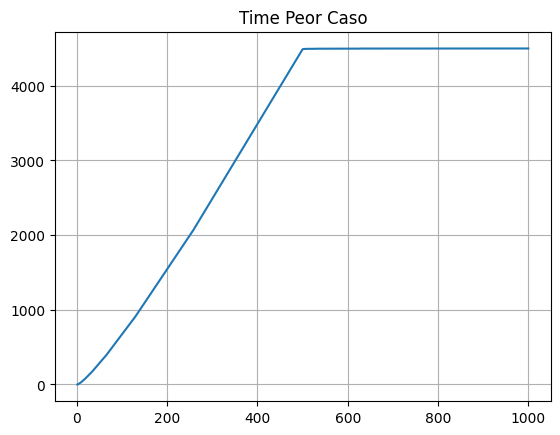

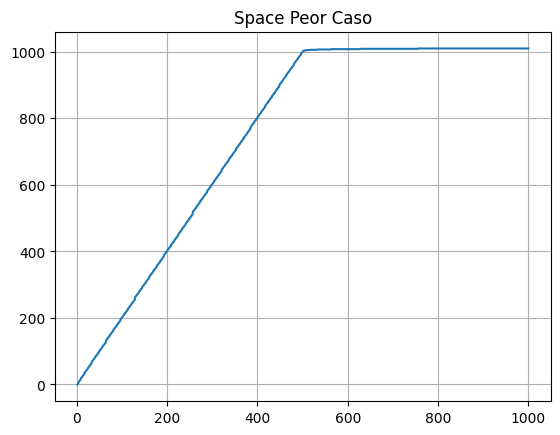

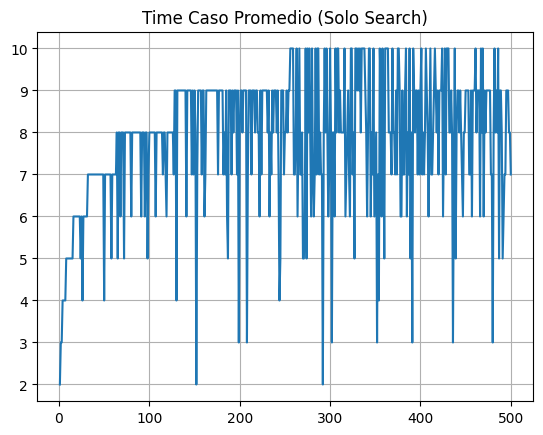

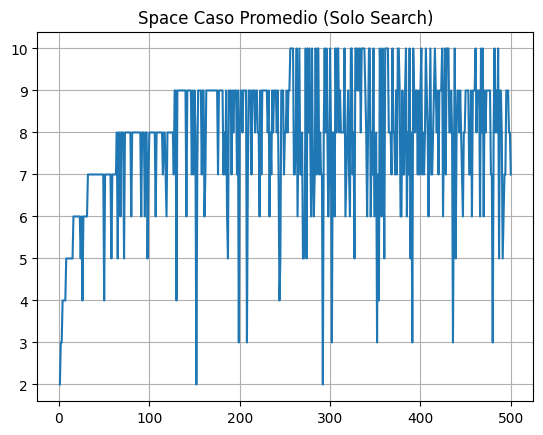

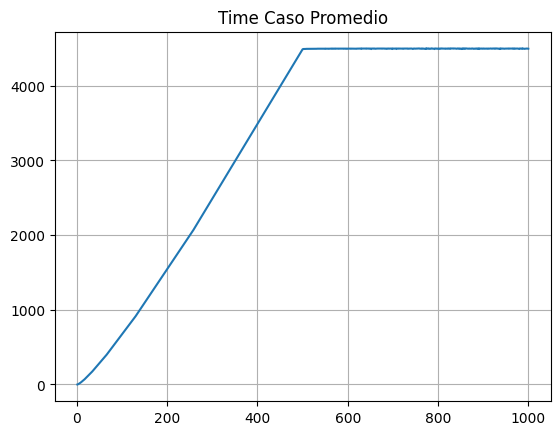

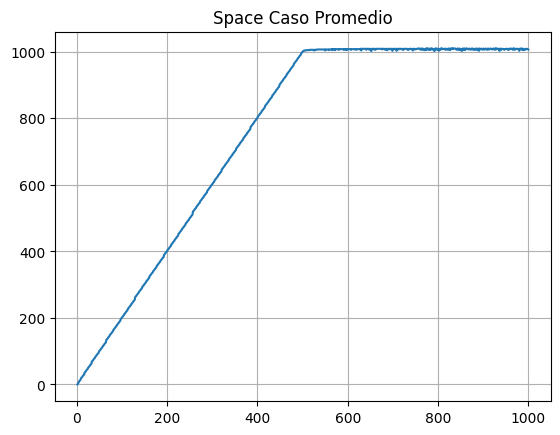

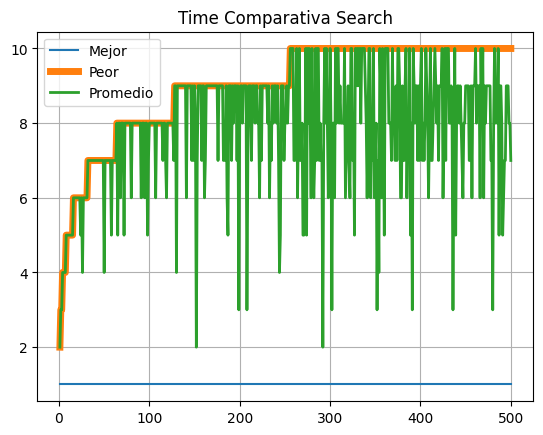

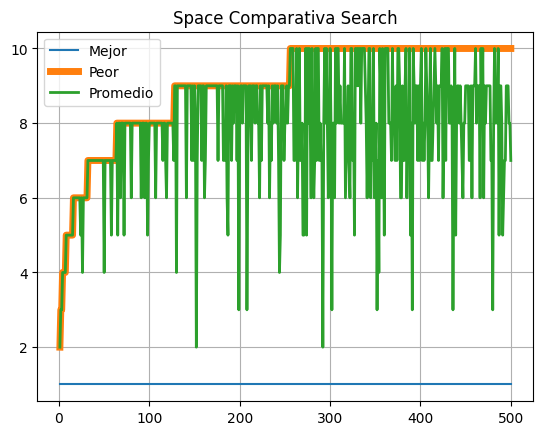

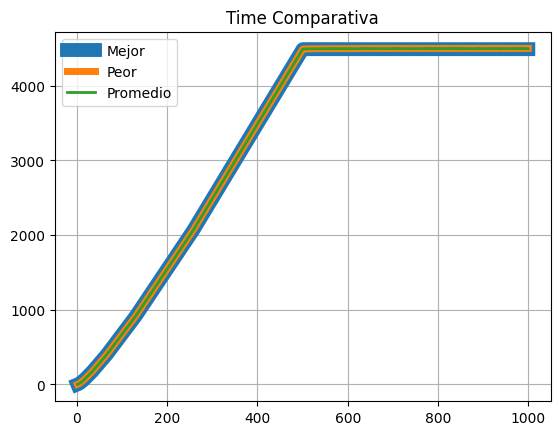

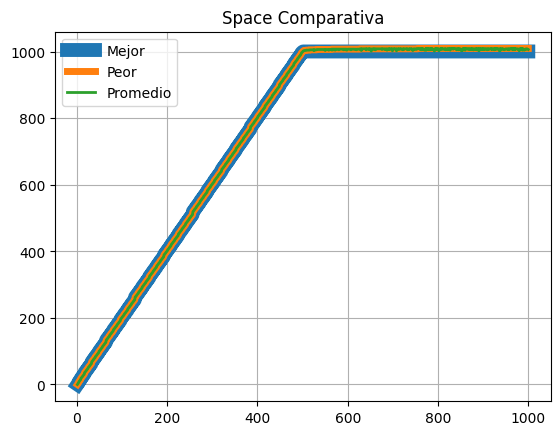

In [95]:
MAX = 500

x = []
x_sort = []
x_search = []

y_mejor_time = []
y_peor_time = []
y_prom_time = []

y_mejor_space = []
y_peor_space = []
y_prom_space = []

y_sort_time = []
y_sort_space = []

y_search_mejor_time = []
y_search_peor_time = []
y_search_prom_time = []

y_search_mejor_space = []
y_search_peor_space = []
y_search_prom_space = []

arr = create_node_arr(MAX, 1, 0, MAX)
aux = []
aux_aux = []

for i in range(MAX):

    aux.append(arr[i])
    x_sort.append(len(aux))

    time_sort, space_sort = merge_sort(aux)

    y_sort_time.append(time_sort)
    y_sort_space.append(space_sort)

x_last = len(aux)
y_last = time_sort
y_last_space = space_sort

plt.title("Merge Sort (Time)")
plt.plot(x_sort, y_sort_time)
plt.grid(True)
plt.show()

plt.title("Merge Sort (Space)")
plt.plot(x_sort, y_sort_space)
plt.grid(True)
plt.show()

for i in range(MAX):
    aux_aux.append(aux[i])
    x_search.append(len(aux_aux))

    sought = aux_aux[i // 2].value
    index, time_search, space_search = binary_search_recursive(aux_aux, sought, 0, len(aux_aux) - 1, 0, 0)
    y_search_mejor_time.append(time_search)
    y_search_mejor_space.append(space_search)

    sought = MAX * 2
    index, time_search, space_search = binary_search_recursive(aux_aux, sought, 0, len(aux_aux) - 1, 0, 0)
    y_search_peor_time.append(time_search)
    y_search_peor_space.append(space_search)

    sought = random.randint(0, MAX)
    index, time_search, space_search = binary_search_recursive(aux_aux, sought, 0, len(aux_aux) - 1, 0, 0)
    y_search_prom_time.append(time_search)
    y_search_prom_space.append(space_search)

x = x_sort[:]

y_mejor_time = y_sort_time[:]
y_peor_time = y_sort_time[:]
y_prom_time = y_sort_time[:]

y_mejor_space = y_sort_space[:]
y_peor_space = y_sort_space[:]
y_prom_space = y_sort_space[:]

for i in range(MAX):
    x.append(x_last + x_search[i])
    
    y_mejor_time.append(y_last + y_search_mejor_time[i])
    y_peor_time.append(y_last + y_search_peor_time[i])
    y_prom_time.append(y_last + y_search_prom_time[i])

    y_mejor_space.append(y_last_space + y_search_mejor_space[i])
    y_peor_space.append(y_last_space + y_search_peor_space[i])
    y_prom_space.append(y_last_space + y_search_prom_space[i])

casos = [
    {"titulo": "Time Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor_time},
    {"titulo": "Space Mejor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_mejor_space},
    {"titulo": "Time Mejor Caso", "datos_x": x, "datos_y": y_mejor_time},
    {"titulo": "Space Mejor Caso", "datos_x": x, "datos_y": y_mejor_space},

    {"titulo": "Time Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor_time},
    {"titulo": "Space Peor Caso (Solo Search)", "datos_x": x_search, "datos_y": y_search_peor_space},
    {"titulo": "Time Peor Caso", "datos_x": x, "datos_y": y_peor_time},
    {"titulo": "Space Peor Caso", "datos_x": x, "datos_y": y_peor_space},
    
    {"titulo": "Time Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom_time},
    {"titulo": "Space Caso Promedio (Solo Search)", "datos_x": x_search, "datos_y": y_search_prom_space},
    {"titulo": "Time Caso Promedio", "datos_x": x, "datos_y": y_prom_time},
    {"titulo": "Space Caso Promedio", "datos_x": x, "datos_y": y_prom_space},
]

for case in casos:
    plt.title(case["titulo"])
    plt.plot(case["datos_x"], case["datos_y"])
    plt.grid(True)
    plt.show()

plt.title("Time Comparativa Search")
plt.plot(x_search, y_search_mejor_time, label="Mejor")
plt.plot(x_search, y_search_peor_time, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom_time, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Space Comparativa Search")
plt.plot(x_search, y_search_mejor_space, label="Mejor")
plt.plot(x_search, y_search_peor_space, label="Peor", linewidth=5)
plt.plot(x_search, y_search_prom_space, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Time Comparativa")
plt.plot(x, y_mejor_time, label="Mejor", linewidth=10)
plt.plot(x, y_peor_time, label="Peor", linewidth=5)
plt.plot(x, y_prom_time, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

plt.title("Space Comparativa")
plt.plot(x, y_mejor_space, label="Mejor", linewidth=10)
plt.plot(x, y_peor_space, label="Peor", linewidth=5)
plt.plot(x, y_prom_space, label="Promedio", linewidth=2)
plt.grid(True)
plt.legend()
plt.show()